In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import keras
import tensorflow

from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, BatchNormalization, Activation

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score 

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path = '/content/drive/MyDrive/Colab Notebooks/DATA(VGG-19)/train2.0'
test_path = '/content/drive/MyDrive/Colab Notebooks/DATA(VGG-19)/test'
val_path = '/content/drive/MyDrive/Colab Notebooks/DATA(VGG-19)/val'

In [ ]:
val_path

'/content/drive/MyDrive/Colab Notebooks/DATA(VGG-19)/val'

In [ ]:
os.listdir(train_path)

['Final EMCI JPEG',
 'Final CN JPEG',
 'Final MCI JPEG',
 'Final AD JPEG',
 'Final LMCI JPEG']

Final EMCI JPEG
/content/drive/MyDrive/Colab Notebooks/DATA(VGG-19)/train2.0/Final EMCI JPEG/ADNI_141_S_2333_MR_Axial_T2_Star__br_raw_20191230131209832_22_S908162_I1270524.jpg


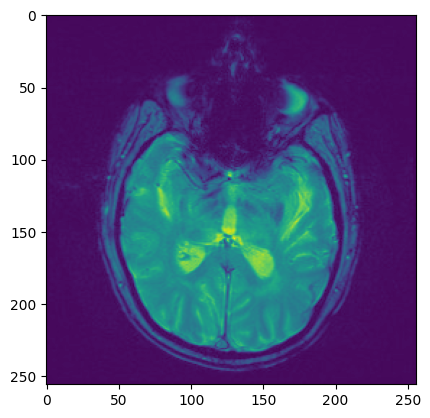

/content/drive/MyDrive/Colab Notebooks/DATA(VGG-19)/train2.0/Final EMCI JPEG/ADNI_094_S_4434_MR_Axial_T2_Star__br_raw_20160204160241110_22_S366265_I621446.jpg


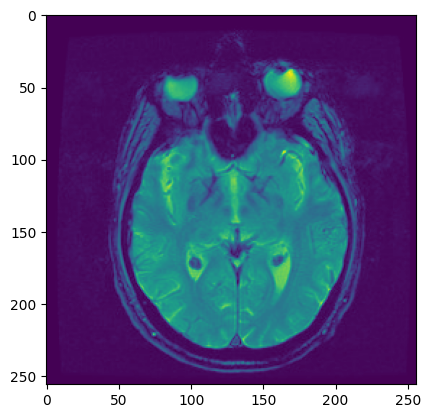

Final CN JPEG
/content/drive/MyDrive/Colab Notebooks/DATA(VGG-19)/train2.0/Final CN JPEG/ADNI_006_S_6500_MR_Axial_T2_Star__br_raw_20180730124751870_22_S710555_I1028500.jpg


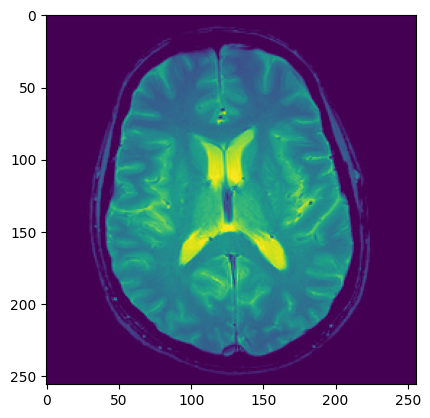

/content/drive/MyDrive/Colab Notebooks/DATA(VGG-19)/train2.0/Final CN JPEG/ADNI_011_S_6465_MR_Axial_T2_STAR__br_raw_20180824131129324_22_S721549_I1041485.jpg


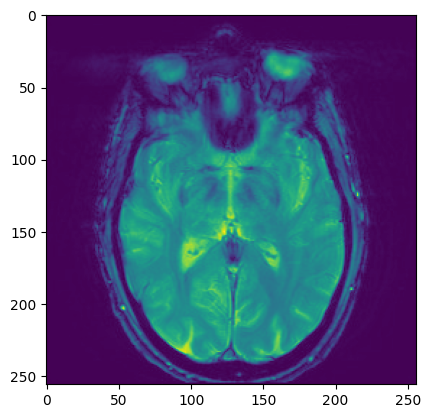

Final MCI JPEG
/content/drive/MyDrive/Colab Notebooks/DATA(VGG-19)/train2.0/Final MCI JPEG/ADNI_130_S_6611_MR_Axial_T2_Star__br_raw_20181023110129177_22_S738607_I1062919.jpg


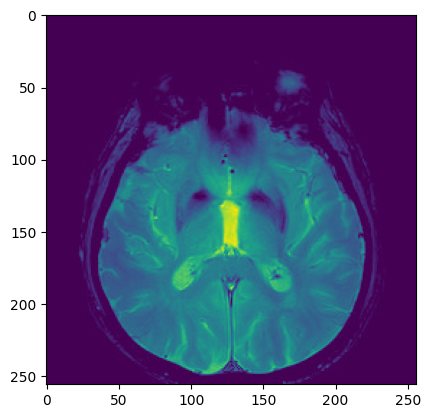

/content/drive/MyDrive/Colab Notebooks/DATA(VGG-19)/train2.0/Final MCI JPEG/ADNI_027_S_6788_MR_Axial_T2_Star__br_raw_20190805153658472_22_S847424_I1195109.jpg


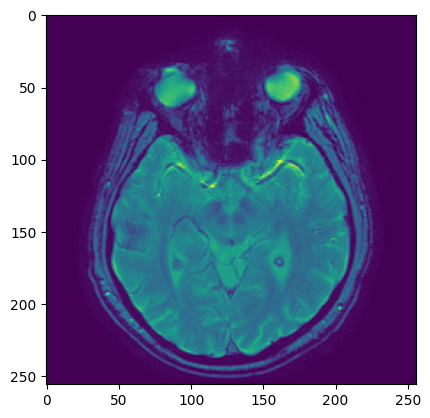

Final AD JPEG
/content/drive/MyDrive/Colab Notebooks/DATA(VGG-19)/train2.0/Final AD JPEG/ADNI_041_S_4510_MR_AXIAL_T2_STAR__br_raw_20160315091324762_22_S395903_I654970.jpg


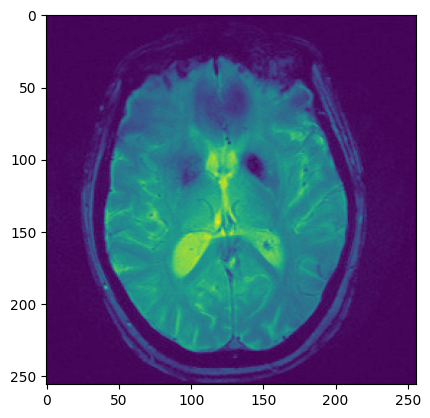

/content/drive/MyDrive/Colab Notebooks/DATA(VGG-19)/train2.0/Final AD JPEG/ADNI_009_S_4324_MR_Axial_T2_Star__br_raw_20190712190312210_22_S840984_I1186574.jpg


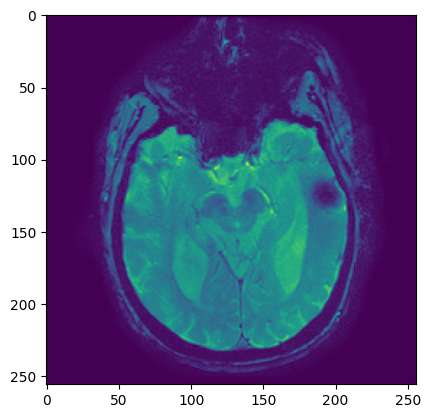

Final LMCI JPEG
/content/drive/MyDrive/Colab Notebooks/DATA(VGG-19)/train2.0/Final LMCI JPEG/ADNI_129_S_6763_MR_Axial_T2_Star__br_raw_20190715145914421_22_S841234_I1186904.jpg


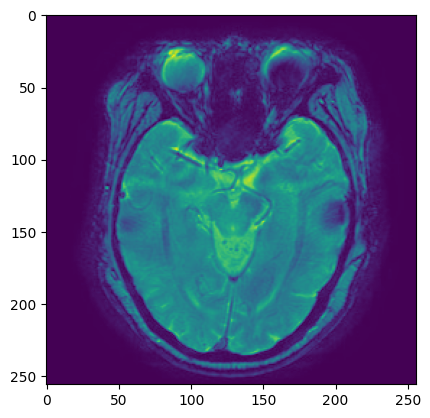

/content/drive/MyDrive/Colab Notebooks/DATA(VGG-19)/train2.0/Final LMCI JPEG/ADNI_129_S_6784_MR_Axial_T2_Star__br_raw_20190731153538799_22_S846568_I1193999.jpg


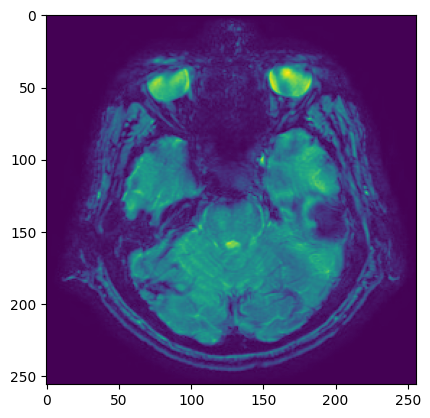

In [ ]:
for folder in os.listdir(train_path):
    sub_path = train_path + "/" + folder
    print(folder)
    # img = os.listdir(sub_path)
    # print(img)
    
    for i in range(2):
        temp_path = os.listdir(sub_path)[i]
        temp_path = sub_path + "/" + temp_path
        print(temp_path)
        img = mpimg.imread(temp_path)
        imgplot = plt.imshow(img)
        plt.show()

In [ ]:
def imagearray(path, size):
    data = []
    for folder in os.listdir(path):
        sub_path=path+"/"+folder
        print(sub_path)

        for img in os.listdir(sub_path):
            image_path=sub_path+"/"+img
            img_arr=cv2.imread(image_path)
            img_arr=cv2.resize(img_arr, size)
            data.append(img_arr)
            
    return data

In [ ]:
# for folder in os.listdir(test_path):
#         sub_path=test_path+"/"+folder
#         # print(sub_path)
#         for img in os.listdir(sub_path):
#             image_path=sub_path+"/"+img
#             # print(image_path)
#             img_arr=cv2.imread(image_path)
#             print(img_arr)


In [ ]:
size = (250,250)

train = imagearray(train_path, size)
test = imagearray(test_path, size)
val = imagearray(val_path, size)

/content/drive/MyDrive/Colab Notebooks/DATA(VGG-19)/train2.0/Final EMCI JPEG
/content/drive/MyDrive/Colab Notebooks/DATA(VGG-19)/train2.0/Final CN JPEG
/content/drive/MyDrive/Colab Notebooks/DATA(VGG-19)/train2.0/Final MCI JPEG
/content/drive/MyDrive/Colab Notebooks/DATA(VGG-19)/train2.0/Final AD JPEG
/content/drive/MyDrive/Colab Notebooks/DATA(VGG-19)/train2.0/Final LMCI JPEG
/content/drive/MyDrive/Colab Notebooks/DATA(VGG-19)/test/Final MCI JPEG
/content/drive/MyDrive/Colab Notebooks/DATA(VGG-19)/test/Final EMCI JPEG
/content/drive/MyDrive/Colab Notebooks/DATA(VGG-19)/test/Final CN JPEG
/content/drive/MyDrive/Colab Notebooks/DATA(VGG-19)/test/Final AD JPEG
/content/drive/MyDrive/Colab Notebooks/DATA(VGG-19)/test/Final LMCI JPEG
/content/drive/MyDrive/Colab Notebooks/DATA(VGG-19)/val/EMCI_val
/content/drive/MyDrive/Colab Notebooks/DATA(VGG-19)/val/AD_val
/content/drive/MyDrive/Colab Notebooks/DATA(VGG-19)/val/LMCI_val
/content/drive/MyDrive/Colab Notebooks/DATA(VGG-19)/val/CN_val
/con

In [ ]:
x_train = np.array(train)
x_test = np.array(test)
x_val = np.array(val)

In [ ]:
x_val

array([[[[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        ...,

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]]],


       [[[ 3,  3,  3],
         [ 3,  3,  3],
         [ 3, 

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0
x_val = x_val/255.0

In [ ]:
x_test

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [ ]:
def data_class(data_path, size, class_mode):
    datagen = ImageDataGenerator(rescale = 1./255)
    classes = datagen.flow_from_directory(data_path,
                                          target_size = size,
                                          batch_size = 32,
                                          class_mode = class_mode)
    return classes

In [ ]:
train_class = data_class(train_path, size, 'sparse')
test_class = data_class(test_path, size, 'sparse')
val_class = data_class(val_path, size, 'sparse')

Found 820 images belonging to 5 classes.
Found 195 images belonging to 5 classes.
Found 281 images belonging to 5 classes.


In [ ]:
train_class.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
y_train = train_class.classes
y_test = test_class.classes
y_val = val_class.classes

In [ ]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
      dtype=int32)

In [ ]:
train_class.class_indices

{'Final AD JPEG': 0,
 'Final CN JPEG': 1,
 'Final EMCI JPEG': 2,
 'Final LMCI JPEG': 3,
 'Final MCI JPEG': 4}

In [ ]:
y_train.shape,y_test.shape,y_val.shape

((820,), (195,), (281,))

In [ ]:
x_train.shape,x_test.shape,x_val.shape

((820, 250, 250, 3), (195, 250, 250, 3), (281, 250, 250, 3))

In [ ]:
vgg = VGG19(input_shape = (250, 250, 3), weights = 'imagenet', include_top = False)

80134624/80134624 [==============================] - 2s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
prediction = Dense(5, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)
model.summary()
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0   

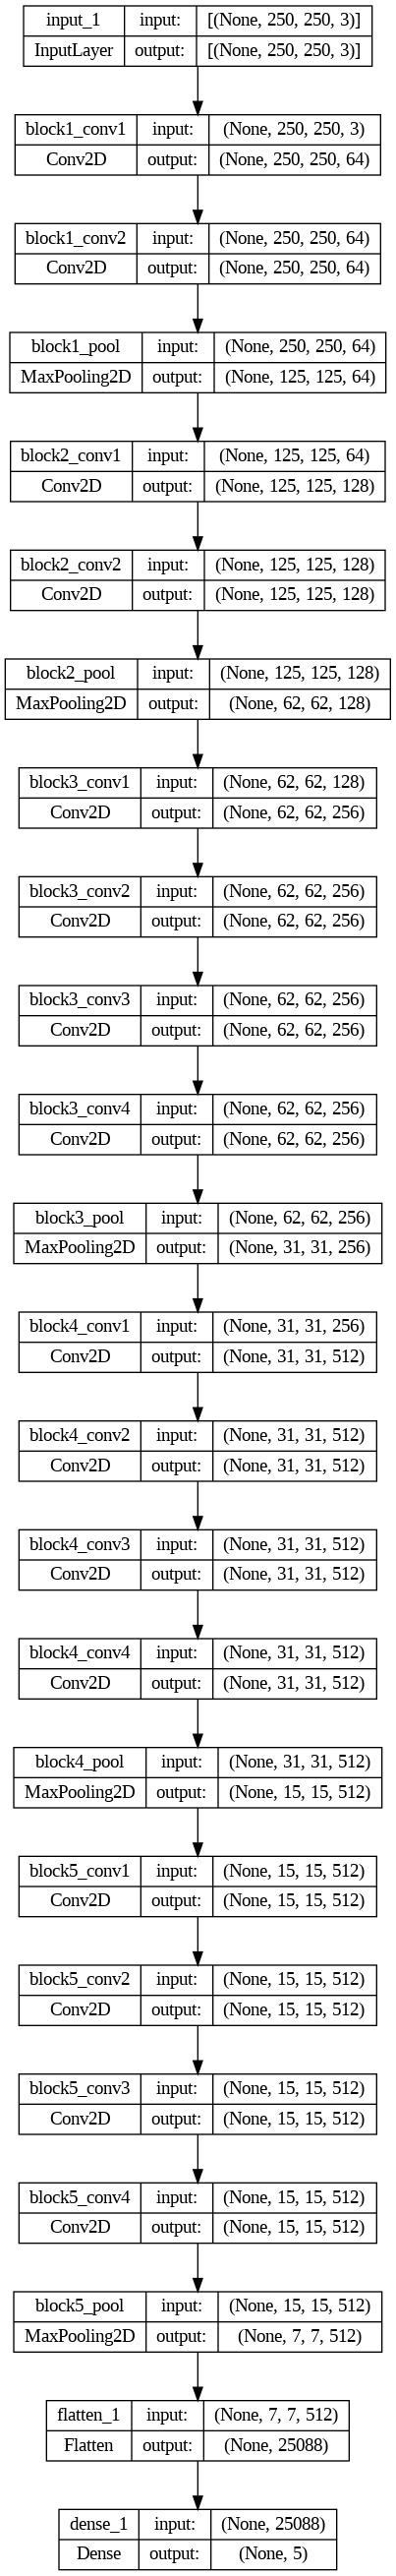

In [ ]:
plot_model(model=model, show_shapes=True)

In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss', mode='min', verbose = 1, patience = 5)

In [ ]:
history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 10, callbacks=[early_stop], batch_size = 30,
                    shuffle=True)

Epoch 1/10
28/28 [==============================] - 1069s 38s/step - loss: 2.1089 - accuracy: 0.4110 - val_loss: 1.8594 - val_accuracy: 0.2313
Epoch 2/10
28/28 [==============================] - 1111s 40s/step - loss: 1.3439 - accuracy: 0.5000 - val_loss: 2.5616 - val_accuracy: 0.2456
Epoch 3/10
28/28 [==============================] - 1041s 37s/step - loss: 1.1101 - accuracy: 0.5829 - val_loss: 2.1172 - val_accuracy: 0.2171
Epoch 4/10
28/28 [==============================] - 1023s 37s/step - loss: 1.0829 - accuracy: 0.5598 - val_loss: 1.9410 - val_accuracy: 0.2028
Epoch 5/10
28/28 [==============================] - 1021s 37s/step - loss: 1.0205 - accuracy: 0.6171 - val_loss: 2.0390 - val_accuracy: 0.2206
Epoch 6/10
28/28 [==============================] - 1021s 37s/step - loss: 0.8711 - accuracy: 0.6939 - val_loss: 2.6459 - val_accuracy: 0.2206
Epoch 6: early stopping


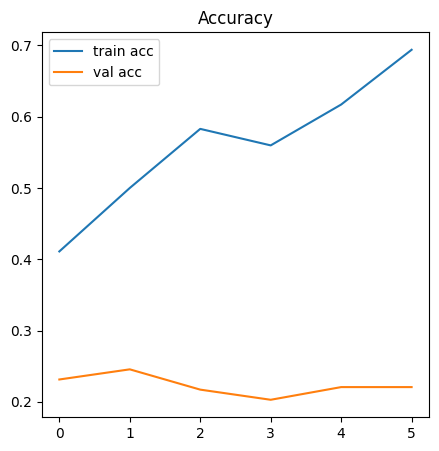

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

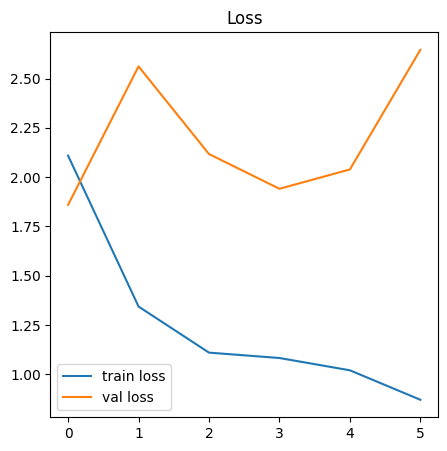

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')
plt.show()

In [ ]:
model.evaluate(x_test, y_test, batch_size=32)

7/7 [==============================] - 195s 27s/step - loss: 1.8649 - accuracy: 0.4667


[1.8648539781570435, 0.46666666865348816]

In [ ]:
y_pred = model.predict(x_test)


7/7 [==============================] - 190s 27s/step


In [ ]:
y_pred=np.argmax(y_pred,axis=1)


In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.99      0.46      0.62       189
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.14      0.83      0.24         6

    accuracy                           0.47       195
   macro avg       0.23      0.26      0.17       195
weighted avg       0.96      0.47      0.61       195



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


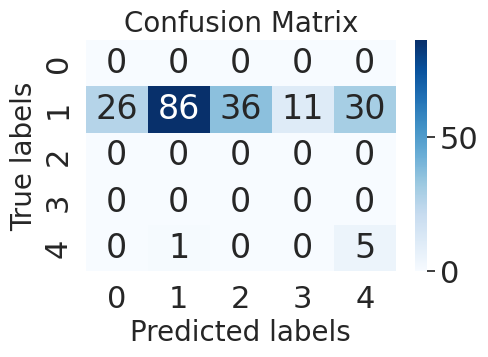

In [ ]:
cm = confusion_matrix(y_pred,y_test)

plt.figure(figsize=(5, 3))
ax = plt.subplot()
sns.set(font_scale=2.0)
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", ax=ax); 

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=20);ax.set_ylabel('True labels', fontsize=20); 
ax.set_title('Confusion Matrix', fontsize=20); 
# ax.xaxis.set_ticklabels(['Grade-A', 'Grade-B', 'Grade-C'], fontsize=20); ax.yaxis.set_ticklabels(['Grade-A', 'Grade-B', 'Grade-C'], fontsize=20);